<a href="https://colab.research.google.com/github/2653319/book-example/blob/main/%E4%BD%BF%E7%94%A8%E7%A5%9E%E7%B6%93%E7%B6%B2%E7%B5%A1%E7%94%9F%E6%88%90%E6%96%87%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W4/ungraded_labs/C3_W4_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 未分級實驗室：使用神經網絡生成文本

本週，您將了解為文本生成準備數據和構建模型的技術。你將用愛爾蘭歌曲的歌詞訓練一個神經網絡，然後讓它為你製作一首新歌。儘管這聽起來像是一個更複雜的應用程序，但您很快就會發現該過程與您在前幾週使用的過程非常相似。只需要很小的修改。讓我們在接下來的部分中看看這些是什麼。

## Imports

首先，您將導入所需的庫。您已經在之前的實驗中使用過所有這些。

In [ ]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## 構建單詞詞彙表

數據集是愛爾蘭傳統歌曲 [*Lanigan's Ball*](https://en.wikipedia.org/wiki/Lanigan%27s_Ball) 的歌詞。您將每行拆分它，然後使用 `Tokenizer` 類來構建單詞索引字典。

In [ ]:
# Define the lyrics of the song
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# 定義總字數。您為索引“0”添加 1，這只是填充標記。
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 8

## 預處理數據集

接下來，您將生成訓練序列及其標籤。正如講座中所討論的，您將獲取歌曲的每一行並從中生成輸入和標籤。例如，如果您只有一個句子：“I am using Tensorflow”，您希望模型在給定這句話的任何子短語的情況下學習下一個詞：

```
INPUT              LABEL
-----------------------------
I             ---> am
I am          ---> using
I am using    ---> Tensorflow
```

下一個單元格顯示瞭如何在代碼中實現這個概念。結果將是作為填充序列的輸入，以及作為 one-hot 編碼數組的標籤。

In [ ]:
a = tokenizer.texts_to_sequences(corpus)

In [ ]:
a[:3]

[[4, 2, 66, 8, 67, 68, 69, 70],
 [71, 40, 20, 21, 72, 3, 73],
 [16, 74, 75, 1, 76, 33, 3, 77, 22]]

In [ ]:
a = tokenizer.texts_to_sequences(corpus)[0]

In [ ]:
a

[4, 2, 66, 8, 67, 68, 69, 70]

In [ ]:
for line2 in corpus:

	# 標記當前行
	token_list2 = tokenizer.texts_to_sequences([line2])[0]
  #token_list2 = tokenizer.texts_to_sequences([line2])

In [ ]:
print(token_list2)

[1, 26, 61, 60, 262, 13, 9, 10]


In [ ]:
print(token_list2)


[1, 26, 61, 60, 262, 13, 9, 10]


In [ ]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# 標記當前行
	token_list = tokenizer.texts_to_sequences([line])[0]
	#print(token_list)
	# 循環多次以生成子短語
	for i in range(1, len(token_list)):
		
		# 生成副詞
		n_gram_sequence = token_list[:i+1]

		# 將副短語附加到序列列表
		input_sequences.append(n_gram_sequence)

# 獲取最長線的長度
max_sequence_len = max([len(x) for x in input_sequences])

# 填充所有序列
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# 通過拆分子短語中的最後一個標記來創建輸入和標籤
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# 將標籤轉換為 one-hot 數組
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
input_sequences

array([[  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       [  0,   0,   0, ...,   2,  66,   8],
       ...,
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9],
       [  0,   0,   0, ...,  13,   9,  10]], dtype=int32)

In [ ]:
input_sequences[:,:-1]

array([[  0,   0,   0, ...,   0,   0,   4],
       [  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       ...,
       [  0,   0,   0, ...,  61,  60, 262],
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9]], dtype=int32)

In [ ]:
input_sequences[:,-1]

array([  2,  66,   8,  67,  68,  69,  70,  40,  20,  21,  72,   3,  73,
        74,  75,   1,  76,  33,   3,  77,  22,  33,   3,  78,   1,  79,
        80,   8,  81,  82,   3,  83,  84,   7,  42,   1,  43,  86,  87,
        33,  44,  88,  13,   2,  45,  89,  90,  91,  92,  93,  94,  95,
        96,  97,   2,  98,   1,   2,  99,   8,   9,  10,  13, 100, 101,
        23, 102, 103,   5,   2,  47,  17,   1,  24,   6, 104, 105,  48,
         4,   3, 106, 107,  42,   1,  43,  49,  25,  50,  18, 108,  25,
         3, 109, 111,  26,  47, 112, 113,  51,  52,   3, 114,   7,  13,
       115,  27,   3, 116,   6,  53, 117, 118, 119, 120,   4,  54,   7,
         9,  10,  11, 121,   8, 122,   1, 123,   7,   2, 124,   1, 126,
        28,  34, 127,   1, 128,  11,   2, 129, 130, 131,   2,  17,   1,
        49,  40,  19, 134,  25,  18, 135,  18, 136, 137,  26, 138, 139,
         4, 140,  55, 141, 143, 144,   1,   2, 145, 146, 147, 148, 149,
        12,   9,  10,  11, 150,   5, 151,   8, 152, 153,  25,   

In [ ]:
ys.shape

(453, 263)

讓我們看看歌曲第一行的結果。特定行和預期的令牌序列顯示在下面的單元格中：

In [ ]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# 查找每個單詞的索引並附加到列表中
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]



由於這裡有 8 個標記，您可以期望在您之前生成的 `xs` 的前 7 個元素中找到該特定行。如果我們生成了最長的子短語，那應該在 `xs[6]` 中找到。請參閱下面的填充令牌序列：

In [ ]:
# 挑選元素
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


token list: [ 0  0  0  4  2 66  8 67 68 69]
decoded to text: ['in the town of athy one jeremy']


如果您打印出標籤，它應該顯示“70”，因為這是短語中的下一個單詞（即“lanigan”）。請參閱下面的 one-hot 編碼形式。您可以使用 [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) 方法獲取“熱”標籤的索引。

In [ ]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 70


如果您在此之前選擇元素，您將看到與上面相同的副短語減去一個單詞：

In [ ]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [ 0  0  0  0  4  2 66  8 67 68]
decoded to text: ['in the town of athy one']
one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 69



## 構建模型

接下來，您將使用與以前基本相同的層來構建模型。主要區別在於您將刪除 sigmoid 輸出並改用 softmax 激活的“密集”層。該輸出層將為詞彙表中的每個單詞提供一個神經元。因此，給定一個輸入標記列表，最後一層的輸出數組將具有每個單詞的概率。

In [ ]:
# Build the model
model = Sequential([
    Embedding(total_words, 64, input_length=max_sequence_len-1), #total_words 字典單字數 input_length -1是因為最後一個單字拿去做標籤
    Bidirectional(LSTM(20)),
    Dense(total_words, activation='softmax')
])

# 使用分類交叉熵 categorical_crossentropy，因為這是一個多類問題
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 64)            16832     
                                                                 
 bidirectional_2 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________



## 訓練模型

您現在可以訓練模型。我們的詞彙量相對較小，因此只需幾分鐘即可完成 500 個 epoch。

In [ ]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
15/15 [==============================] - 4s 9ms/step - loss: 5.5678 - accuracy: 0.0287
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5417 - accuracy: 0.0574
Epoch 3/500
15/15 [==============================] - 0s 10ms/step - loss: 5.4754 - accuracy: 0.0552
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 5.2941 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 5.1202 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0633 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 9ms/step - loss: 5.0252 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0007 - accuracy: 0.0574
Epoch 9/500
15/15 [==============================] - 0s 11ms/step - loss: 4.9698 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 19ms/step - loss: 4.9380 - accuracy: 0.0530
Epoch


您可以使用下面的實用程序可視化結果。使用默認設置，您應該在 500 個 epoch 後看到大約 95% 的準確度。

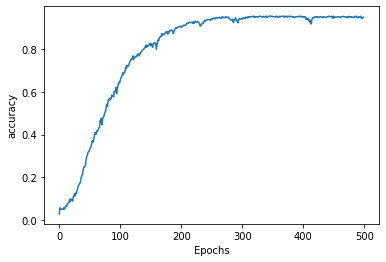

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

## 生成文本

通過訓練模型，您現在可以使用它來製作自己的歌曲！該過程如下所示：

1. 輸入種子文本以啟動該過程。
2. 模型預測最可能的下一個詞的索引。
3.在逆詞索引詞典中查找索引
4. 將下一個單詞附加到種子文本中。
5. 再次將結果輸入模型。

將重複步驟 2 到 5，直到達到所需的歌曲長度。看看它是如何在下面的代碼中實現的：

In [ ]:
# 定義種子文本
seed_text = "Laurence went to Dublin"

# 定義要預測的總詞數
next_words = 100

# 循環直到達到所需長度
for _ in range(next_words):

	# 將種子文本轉換為標記序列
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# 填充序列
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# 輸入模型並獲取每個索引的概率
	probabilities = model.predict(token_list)

	# 獲取概率最高的索引
	predicted = np.argmax(probabilities, axis=-1)[0]

	# 如果 index 為 0 則忽略，因為這只是填充。
	if predicted != 0:
		
		# 查找與索引關聯的單詞。
		output_word = tokenizer.index_word[predicted]

		# 結合種子文本
		seed_text += " " + output_word

# 打印結果
print(seed_text)

Laurence went to Dublin the left pound row near groups groups strangled satisfaction at me me stepped oh casey lanigans ball ball me stepped were away were merry were merry as bees steps for lanigans ball all ball lanigans ball together the girls away they all were hearty hearty might ask hall ask hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall hall


在上面的輸出中，您可能會注意到句子越長，單詞就會頻繁重複。有辦法繞過它，下一個單元格顯示一個。基本上，您將獲得前三個索引並隨機選擇一個，而不是獲得最大概率的索引。看看使用這種方法輸出文本是否更有意義。這不是最省時的解決方案，因為即使您只需要前三個，它也總是對整個數組進行排序。隨意改進它，當然，您也可以開發自己的選擇下一個單詞的方法。

In [ ]:
seed_text = "Laurence went to Dublin"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
probabilities = model.predict(token_list)
probabilities

In [ ]:
choice = np.random.choice([1,2,3])
choice

3

In [ ]:
predicted = np.argsort(probabilities)[0][-choice]

In [ ]:
d = np.argsort(probabilities)[0]

In [ ]:
d

array([245,  95, 141,  55, 193, 218, 202,  97,  69, 159,  96, 181,  70,
       105, 147, 183, 184,  94, 262, 120, 229, 220, 173, 171, 167, 250,
       153, 215,  68, 228, 246, 204, 103, 244,  77, 118, 170,  93, 214,
       191, 231,  74,  92, 240, 207, 180,  91, 106, 260, 130,  63, 201,
       192, 255, 185, 257, 168,  88, 249, 128,  72, 187,  36, 223, 182,
       146, 203, 158, 258, 189, 133, 109, 247, 119, 163, 104, 132, 111,
       113, 194,  85,  46, 142, 197, 156,  71, 125, 233, 110,   0, 212,
       235, 117,  57, 221, 188, 157, 230, 186, 136, 145,  87,  67,  82,
        79, 224, 211, 254, 259, 242, 219, 241, 198,  90, 217, 200, 176,
       225, 253, 140, 116, 131,  80,  24, 179, 166,  83, 169, 155,  22,
       102, 227,  81, 107,  35,  32,  64,  43, 139,  86, 129, 234, 134,
        78, 101, 196,  31, 150, 178, 239, 243, 135, 127, 172, 112, 175,
       206,  65,  56,  84, 261,  99,  75,  60, 210, 114,  45,  73, 123,
        30, 154,  66,  76,  28,  21, 152,  44, 177, 205, 248, 10

In [ ]:
predicted

50

In [ ]:
# 定義種子文本
seed_text = "Laurence went to Dublin"

# 定義要預測的總詞數
next_words = 100

# 循環直到達到所需長度
for _ in range(next_words):

	# 將種子文本轉換為標記序列
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# 填充序列
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# 輸入模型並獲取每個索引的概率
  probabilities = model.predict(token_list)

  # 從 [1,2,3] 中選擇一個隨機數
  choice = np.random.choice([1,2,3])
	
  # 按升序對概率進行排序
  # 並從數組末尾獲取隨機選擇
  predicted = np.argsort(probabilities)[0][-choice]

	# 如果 index 為 0 則忽略，因為這只是填充
  if predicted != 0:
		
		# 查找與索引關聯的單詞。 
	  output_word = tokenizer.index_word[predicted]

		# 結合種子文本
	  seed_text += " " + output_word

# 打印結果	
print(seed_text)

Laurence went to Dublin merry and the harp that groups milliner strangled ask odaly swore might odaly ask might wall ned hall hall ask glisten odaly them away me lanigans ball me ball me me me stepped as stepped oh stepped for again a her relations might mchugh hall mchugh satisfaction me round ball me stepped went rose again rose as ned rose rose cask rose died rose for her harp relations might further youll ogradys youll mchugh ask hall hall hall glisten glisten didnt i them round spent odaly them round gave a glisten water water red entangled me stepped were as give


##包起來

在本實驗中，您首先了解了準備數據和構建文本生成模型。在這個特定的練習中，語料庫相當小，在接下來的課程中，您將使用更大的文本構建一個語料庫。到時候那裡見！